<a href="https://colab.research.google.com/github/mcalmeida13/math-machine-learning/blob/main/logistic-regression/cross_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Samples
N = 100

# Features
D = 2

In [4]:
X = np.random.randn(N,D)

In [5]:
N_per_class = N//2

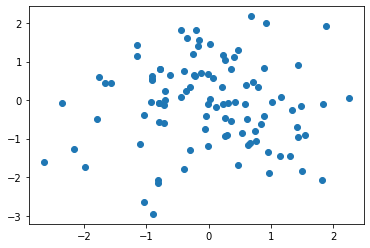

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

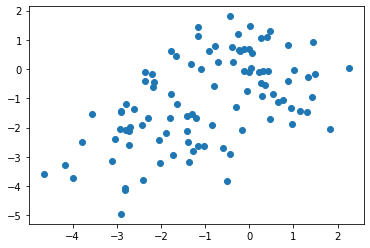

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
# center the last 50 points at (-2,-2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

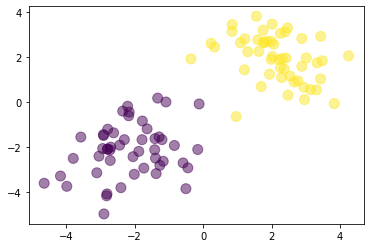

In [21]:
plt.scatter(X[:,0],X[:,1],c=T, s=100, alpha=0.5)

In [11]:
# labels: first 50 are 0, last 50 are 1
# Target
T = np.array([0]*N_per_class + [1]*N_per_class)

In [12]:
# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

In [24]:
# randomly initizalize the weights
w = np.random.randn(D+1)

In [14]:
# model output
z = Xb.dot(w)

In [15]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [16]:
# Probability of the class
Y = sigmoid(z)

In [17]:
# cross entropy
def cross_entropy(T,Y):
  E = 0
  for i in range(len(T)):
    if T[i] == 1:      
        E -= np.log(Y[i])
    else:  
        E -= np.log(1-Y[i])
  return E

In [18]:
print(cross_entropy(T, Y))

345.10912992727646


In [19]:
# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))

0.6374812303617567


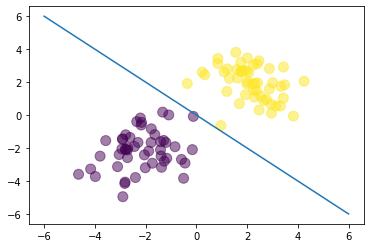

In [20]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)

x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

# Gradient descent

In [30]:
w.dtype

dtype('float64')

In [27]:
learning_rate*Xb.T.dot(T - Y)

array([-0.01193565,  0.02698797, -0.01084209])

In [28]:
w + learning_rate*Xb.T.dot(T - Y)

array([ 0.91044211, -1.60915964, -0.68847072])

In [31]:
# Let's do gradient descent 100 times

learning_rate = 0.1

for i in range(100):
  if i%10 == 0:
    print(cross_entropy(T,Y))

  # gradient descent weight update 
  # (do the calculation of the derivative aalytically and find this expression)
  w += learning_rate*Xb.T.dot(T - Y)

  # recalculate Y
  Y = sigmoid(Xb.dot(w)) 

0.6374812303617567
0.04170592894334312
0.04015968119109165
0.03872842448277124
0.037400121901209324
0.03616434369490364
0.03501200936719805
0.03393517763076358
0.03292687422024236
0.03198094986846726


In [32]:
print("Final w:", w)

Final w: [ 0.39010355 19.63396556 19.20634428]


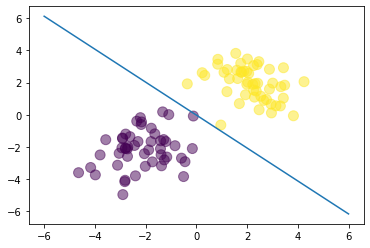

In [33]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()